In [38]:
# THIS IS AN EXAMPLE OF REGRESSION MODEL FITING.
# FOR BOTH CLASSIFICATION AND REGRESSION.

%timeit
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split




In [4]:
import mglearn

# THE MODULE HAS EXTENDED BOSTON DATASET.

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=98)



C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

MODEL 1: LINEAR REGRESSION.

In [5]:
linear_regression = LinearRegression().fit(X_train, y_train)

#TEST AND TRAINNING SCORE.

print("Training set score: {:.2f}".format(linear_regression.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linear_regression.score(X_test, y_test)))




Training set score: 0.95
Test set score: 0.66


MODEL 2: RIDGE REGRESSION AND HYPER PARAMETER PROPERTIES.

In [6]:
ridge_regression = Ridge().fit(X_train, y_train)

# TEST AND TRAINNING SCORE
print("Training score: {:.2f}".format(ridge_regression.score(X_train, y_train)))
print("Test score : {:.2f}".format(ridge_regression.score(X_test, y_test)))

Training score: 0.88
Test score : 0.76


In [7]:
# FOR THE RIDGE REGRESSION THE PARAMETER TO BE TUNED IS ALPHA

ridge_alpha_5 = Ridge(alpha=5).fit(X_train, y_train)

# TEST AND TRAINNING SCORE
print("Training score: {:.2f}".format(ridge_alpha_5.score(X_train, y_train)))
print("Test score : {:.2f}".format(ridge_alpha_5.score(X_test, y_test)))

Training score: 0.82
Test score : 0.70


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()


In [ ]:
# FOR THE RIDGE REGRESSION THE PARAMETER TO BE TUNED IS ALPHA

ridge_alpha_1 = Ridge(alpha=0.1669).fit(X_train, y_train)

# TEST AND TRAINNING SCORE
print("Training score: {:.4f}".format(ridge_alpha_1.score(X_train, y_train)))
print("Test score : {:.4f}".format(ridge_alpha_1.score(X_test, y_test)))

Training score: 0.9209
Test score : 0.7753


In [ ]:
# NOW PLOTTING THE RESULTS TO DETERMINE THE BEST ALPHA LEVEL.
# DECIDED TO PLOT THE VALUES THE CELL ABOVE.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


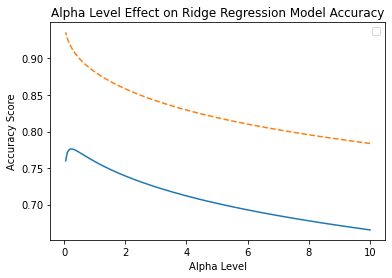

In [ ]:
# CREATING A METHOD TO VIEW HOW ALPHA CHANGES MODEL ACCURACY.
import numpy as np
from sklearn.linear_model import Ridge
alpha_values = np.arange(10, 0.01, -0.05 )
#print(alpha_values.shape[0])

test_score = []
train_score = []

for alpha in range(alpha_values.shape[0]):
    ridge_alpha = Ridge(alpha=alpha_values[alpha]).fit(X_train, y_train)
    train_score.append(ridge_alpha.score(X_train, y_train))
    test_score.append(ridge_alpha.score(X_test, y_test))

    # PLOTTING IS DONE OUTSIDE.

plt.plot(alpha_values, test_score, '-')
plt.plot(alpha_values, train_score, '--')
plt.axis('tight')
plt.title('Alpha Level Effect on Ridge Regression Model Accuracy')
plt.xlabel('Alpha Level')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()






LASSSO REGRESSION AND PARAMETER PROPERTIES.

In [30]:
from sklearn.linear_model import Lasso

lass_regression = Lasso().fit(X_train, y_train)
print("Trainning set score: {:.2f}".format(lass_regression.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lass_regression.score(X_test, y_test)))
print("number of features used: {}".format(np.sum(lass_regression.coef_ != 0 )))

Trainning set score: 0.27
Test set score : 0.24
number of features used: 4


In [ ]:
" as can be seen the model is underfit Badly!, it used 4 of the 105 features"
"Lass pushed the features to zero real quick!"
"To overcome this( underfitting), we need to tweak alpha plus another hyper parameter aka max_iter)"
 

In [32]:
# INCREASE THE DEFAULT SETTING OF MAX_ITER 
# OTHERWISE THE MODEL WOULD ISSUE OUT A WARNING.

lasso001 = Lasso(alpha=0.01, max_iter= 100000).fit(X_train, y_train)

#THE SCORING...

print("Trainning set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lasso001.score(X_test, y_test)))
print("number of features used: {}".format(np.sum(lasso001.coef_ != 0 )))

Trainning set score: 0.89
Test set score : 0.76
number of features used: 34


In [33]:
# INCREASE THE DEFAULT SETTING OF MAX_ITER 
# OTHERWISE THE MODEL WOULD ISSUE OUT A WARNING.

lasso0001 = Lasso(alpha=0.0001, max_iter= 100000).fit(X_train, y_train)

#THE SCORING...

print("Trainning set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score : {:.2f}".format(lasso0001.score(X_test, y_test)))
print("number of features used: {}".format(np.sum(lasso0001.coef_ != 0 )))

Trainning set score: 0.95
Test set score : 0.69
number of features used: 94


In [34]:
# INCREASING THE VALUE OF ALPHA BEYOND CERTAIN LEVEL DOES INDEED 
# HAVE AN EFFECT ON THE MODEL ACCURACY.
# ITS RECOMENDED THAT INORDER TO FIND THE OPTIMUM VALUE OF THIS FOR MAX ACCURACY
# WRITE A CODE TO FIND THIS VALUE FOR VARIOUS VALUES OF ALPHA.
# RECOMENDER? -> ME HAHA.
# A NEWBIE...WHO JUST LEARNING AS YOU ARE.

# ADDITIONALY THE MOST PREFERED OF THE TWO.
# SIMPLE MODEL USE LASSO 
# FIST TO MODEL RIDGE.

# YOU CAN ALSO HAVE THE BEST OF BOTH WORLDS.
# USE ELASTIC NET, IT COMBINES BOTH BUT AT THE PRICE OF THE TWO PARAMERS 
# ONE FOR BOTH L1 - LASSO AND L2 - RIDGE. 

In [ ]:
# HAVING SAID THAT FOR LINEAR MOD